In [46]:
import numpy as np
from sklearn import datasets
import copy
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False

In [47]:
digits = datasets.load_digits()  # 手写数字数据集
X = digits.data
y = copy.deepcopy(digits.target)

y[digits.target == 9] = 1
y[digits.target != 9] = 0  # 使数据类别不平衡(使其变为二分类问题)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)
log_reg = LogisticRegression(solver='sag', max_iter=10000)
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

0.9755555555555555

In [49]:
y_log_predict = log_reg.predict(X_test)
y_log_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [50]:
def confusion_DataFrame(y_true, y_predict):
    """计算混淆矩阵(二分类)"""
    num = len(y_true)
    TN = np.sum((y_true == 0) & (y_predict == 0))
    TP = np.sum((y_true == 1) & (y_predict == 1))
    FP = np.sum((y_true == 0) & (y_predict == 1))
    FN = num - TN - TP - FP
    index = columns = [0, 1]
    arr = np.array([[TN, FP], [FN, TP]])
    frame = pd.DataFrame(arr, index=index, columns=columns)

    return frame

In [51]:
result = confusion_DataFrame(y_test, y_log_predict)
result

,0,1
0,403,2
1,9,36


In [52]:
def precision_score(matrix):
    """计算查准率(二分类)"""
    return matrix[1, 1] / (matrix[1, 1] + matrix[0, 1])

In [53]:
pre = precision_score(result.values)
pre

0.9473684210526315

In [54]:
def recall_score(matrix):
    """计算召回率(二分类)"""
    return matrix[1, 1] / (matrix[1, 1] + matrix[1, 0])

In [55]:
rec = recall_score(result.values)
rec

0.8

In [56]:
def f1_score(precision, recall):
    """计算F1值(二分类)"""
    return 2 * precision * recall / (precision + recall)

In [57]:
f1_score(pre, rec)

0.8674698795180723

In [58]:
decision_scores = log_reg.decision_function(X_test)  # 计算样本到分离超平面的有符号距离
decision_scores

array([-20.86833244, -31.26276565, -15.53446212, -77.29795908,
       -45.99277845, -23.52031397, -42.25327276, -24.13780445,
        -0.97490207, -20.1507559 , -63.36929136, -49.00621254,
       -30.4356728 , -43.87949867, -37.68672473, -28.98917339,
       -36.01358924, -78.18040463, -37.11235431, -11.31997083,
        -8.58656596, -80.79880335, -15.8320417 , -44.3090416 ,
        -5.48066338, -45.45697896, -11.00769304, -39.08325313,
       -23.83745189, -14.26341624, -16.14673858, -27.77148323,
       -33.45841061, -29.11040263,  -7.75938274,  -3.56368148,
       -24.53619119, -21.87315911, -33.06333951, -22.03668962,
       -25.68265423, -59.49968365, -37.64697573, -63.67292645,
       -19.02404202, -16.89875833, -17.29996273, -21.67824821,
       -28.84399271, -19.30272526,   0.89150788,   8.20503361,
       -35.77589697, -40.07440874, -24.90642157, -33.49385617,
        -9.06429796, -48.49488524, -48.39767273,  19.47523579,
        -8.07514044, -30.54906545, -11.2392691 ,  -0.31

In [59]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

precisions = []
recalls = []
thresholds = np.arange(np.min(decision_scores), np.max(decision_scores), 0.1)
for threshold in thresholds:
    """计算不同threshold下对应的查准率与查全率"""
    y_predict = np.array(decision_scores >= threshold, dtype=np.int32)
    precisions.append(precision_score(y_test, y_predict))
    recalls.append(recall_score(y_test, y_predict))


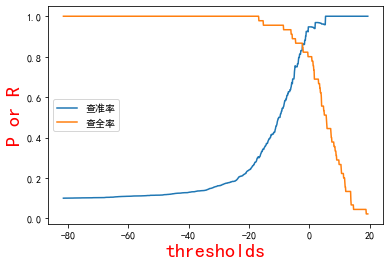

In [60]:
plt.plot(thresholds, precisions, label='查准率')
plt.plot(thresholds, recalls, label='查全率')
plt.xlabel('thresholds', color='red', size=20)
plt.ylabel('P or R', color='red', size=20)
plt.legend()
plt.show()

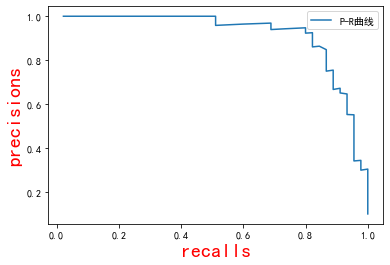

In [62]:
plt.plot(recalls, precisions, label='P-R曲线')  # 绘制P-R曲线
plt.xlabel('recalls', color='red', size=20)
plt.ylabel('precisions', color='red', size=20)
plt.legend()
plt.show()